In [10]:
import warnings; 
warnings.simplefilter('ignore')

In [14]:

!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 11.3 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [27]:
from prophet import Prophet

In [28]:
import pandas as pd

In [17]:
df = pd.read_csv('/content/prophet.csv')

In [18]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Time Date  1080 non-null   int64  
 1   Product    1080 non-null   int64  
 2   Store      1080 non-null   object 
 3   Value      1080 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 33.9+ KB


In [20]:
df.describe()

,Time Date,Product,Value
count,1.080000e+03,1080.0,1080.000000
mean,1.567207e+07,2667437.0,4048.117478
std,8.791548e+06,0.0,1439.945783
min,1.012018e+06,2667437.0,2042.813500
25%,8.069518e+06,2667437.0,2632.498599
50%,1.556702e+07,2667437.0,4256.000000
75%,2.308452e+07,2667437.0,5288.248910
max,3.112202e+07,2667437.0,8147.739600


In [21]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])

In [22]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [23]:
df.drop(['Time Date', 'Product', 'Store', 'Year', 'Month', 'Day'], axis=1, inplace=True)
df.columns = ['y', 'ds']

In [24]:
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [29]:
#Training Model 
m = Prophet(interval_width=0.95, daily_seasonality=True)
model = m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmptcpz4wpj/vm_rn5jy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptcpz4wpj/g64oyoqe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=7606', 'data', 'file=/tmp/tmptcpz4wpj/vm_rn5jy.json', 'init=/tmp/tmptcpz4wpj/g64oyoqe.json', 'output', 'file=/tmp/tmptcpz4wpj/prophet_modelu762t8av/prophet_model-20230103191759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:17:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:17:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [30]:
df.tail()

,y,ds
1075,3167.594500,2020-12-12
1076,3167.594500,2020-12-13
1077,3383.354511,2020-12-14
1078,2714.591329,2020-12-15
1079,2585.035107,2020-12-16


Forecast for the next 100 days . 


In [31]:
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)
forecast.head()


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.070476,560.927760,4077.691685,3041.070476,3041.070476,-642.519352,-642.519352,-642.519352,466.57542,...,16.623819,16.623819,16.623819,-1125.718591,-1125.718591,-1125.718591,0.0,0.0,0.0,2398.551124
1,2018-01-02,3041.848842,914.054594,4019.920666,3041.848842,3041.848842,-652.648904,-652.648904,-652.648904,466.57542,...,-11.281075,-11.281075,-11.281075,-1107.943248,-1107.943248,-1107.943248,0.0,0.0,0.0,2389.199937
2,2018-01-03,3042.627207,725.256606,3917.002946,3042.627207,3042.627207,-626.822675,-626.822675,-626.822675,466.57542,...,-4.411502,-4.411502,-4.411502,-1088.986593,-1088.986593,-1088.986593,0.0,0.0,0.0,2415.804532
3,2018-01-04,3043.405573,978.195550,4002.133880,3043.405573,3043.405573,-579.864732,-579.864732,-579.864732,466.57542,...,22.484584,22.484584,22.484584,-1068.924735,-1068.924735,-1068.924735,0.0,0.0,0.0,2463.540841
4,2018-01-05,3044.183939,909.359582,4074.171571,3044.183939,3044.183939,-615.887354,-615.887354,-615.887354,466.57542,...,-34.576305,-34.576305,-34.576305,-1047.886469,-1047.886469,-1047.886469,0.0,0.0,0.0,2428.296585


In [32]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1175,2021-03-22,4238.518178,2249.669082,5181.421609,4235.631634,4241.163793,-515.871161,-515.871161,-515.871161,466.57542,...,16.623819,16.623819,16.623819,-999.070400,-999.070400,-999.070400,0.0,0.0,0.0,3722.647017
1176,2021-03-23,4239.589543,2056.147331,5190.260640,4236.658475,4242.301052,-533.339122,-533.339122,-533.339122,466.57542,...,-11.281075,-11.281075,-11.281075,-988.633467,-988.633467,-988.633467,0.0,0.0,0.0,3706.250421
1177,2021-03-24,4240.660909,2044.506763,5219.774530,4237.670045,4243.418035,-518.810470,-518.810470,-518.810470,466.57542,...,-4.411502,-4.411502,-4.411502,-980.974387,-980.974387,-980.974387,0.0,0.0,0.0,3721.850439
1178,2021-03-25,4241.732274,2141.814169,5369.531302,4238.669245,4244.525526,-487.616197,-487.616197,-487.616197,466.57542,...,22.484584,22.484584,22.484584,-976.676200,-976.676200,-976.676200,0.0,0.0,0.0,3754.116077
1179,2021-03-26,4242.803639,2026.331269,5274.501492,4239.707121,4245.633017,-544.237881,-544.237881,-544.237881,466.57542,...,-34.576305,-34.576305,-34.576305,-976.236996,-976.236996,-976.236996,0.0,0.0,0.0,3698.565759


In [33]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-01-01,2398.551124
1,2018-01-02,2389.199937
2,2018-01-03,2415.804532
3,2018-01-04,2463.540841
4,2018-01-05,2428.296585
...,...,...
1175,2021-03-22,3722.647017
1176,2021-03-23,3706.250421
1177,2021-03-24,3721.850439
1178,2021-03-25,3754.116077


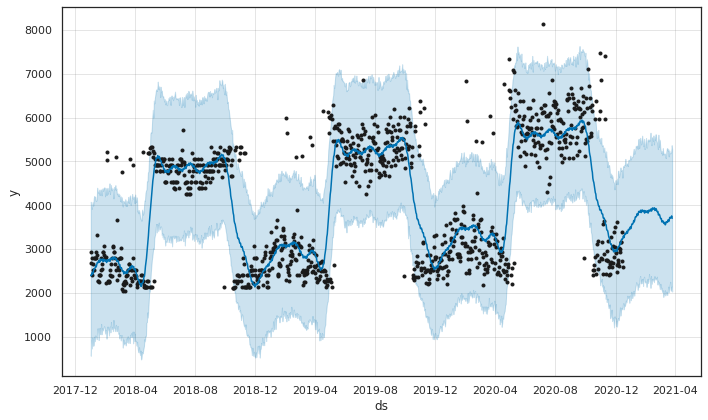

In [34]:
plot1 = m.plot(forecast)

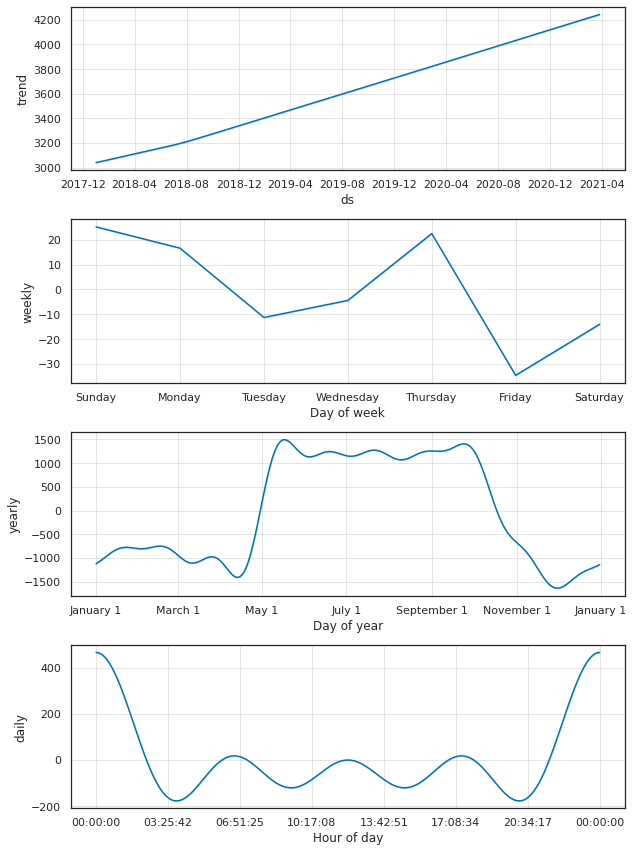

In [35]:
plt2 = m.plot_components(forecast)